# Analiza slovenskih hribov
Za svojo projektno nalogo bom analizirala podatke o slovenskih hribih, gorah in še čem, najdenih na [spletni strani hribi.net](https://www.hribi.net/).
Za začetek si oglejmo tabelo z vsemi podatki, urejeno padajoče po priljubljenosti.

In [58]:
import pandas as pd
tabela_gora = pd.read_csv("podatki v csv/gore.csv")
tabela_gora = tabela_gora.rename(
    columns={"priljubljenost": "priljubljenost (%)", "st_poti": "število poti", "st_slik": 
    "število slik", "visina": "višina"})
    

In [59]:
tabela_gora.sort_values("priljubljenost (%)", ascending=False)

,gorovje,ime,ogledi,priljubljenost (%),število poti,število slik,višina,vrsta
997,Kamniško Savinjske Alpe,Koča na Kriški gori,960331,100,9,9,1471,koča
888,Kamniško Savinjske Alpe,Storžič,1146458,100,30,29,2132,vrh
299,Julijske Alpe,Triglav,1637409,100,28,42,2864,"vrh, bivak"
1152,Karavanke,Stol,1142759,100,20,23,2236,vrh
1168,Karavanke,Begunjščica,1027950,100,14,29,2060,vrh
...,...,...,...,...,...,...,...,...
1531,"Pohorje, Dravinjske gorice in Haloze",Izvir Dravinje,39,3,1,2,1460,Ni podana
2259,"Strojna, Košenjak, Kozjak in Slovenske gorice",Lovsko zavetišče LD Mala Nedelja,30,3,1,1,215,koča
1574,"Pohorje, Dravinjske gorice in Haloze",Hotel Tisa (Poštarski dom),37,3,1,2,912,koča
1603,"Pohorje, Dravinjske gorice in Haloze",Sveti Miklavž (Koritno),18,2,1,2,678,cerkev


### Vrste lokacij na strani

Ker smo opazili, da se kot vrsta "lokacije na strani" pogosto pojavi nekaj, kar sploh ni hrib ali gora, temveč je le npr. cerkev ali jezero, si želimo pogledati, če so vrhovi sploh najpogovstejša vrsta objekta na spletni strani. Če niso, potem lahko pišemo adminu, naj spletno stran preimenuje v "cerkve.net", "jezera.net" ali karkoli je že primerno.

<Axes: xlabel='vrsta'>

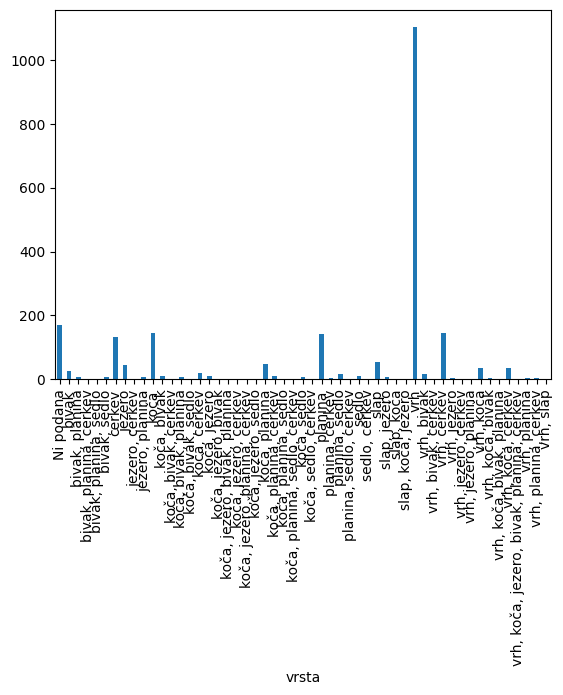

In [60]:
import matplotlib
vrste = pd.read_csv("podatki v csv/vrste.csv")
objekti_po_vrstah = vrste.groupby("vrsta")
objekti_po_vrstah.size().plot.bar()

Očitno nas (ali pa samo mene) je zavedlo dejstvo, da zadnjih nekaj vrstic v prvi tabeli niso vrhovi. Presenetljivo pa je morda dejstvo, da je od 2264 lokacij na spletni strani le slabih ?? vrhov. Admina pa lahko pustimo pri miru.

### Vrhovi po višini
Zdaj si poglejmo višino vrhov. Kot ponosna državljanka že vrsto let vem, kateri je najvišji slovenski vrh. Šele sedaj pa sem se zavedala, da ne vem, kateri je najnižji...

In [61]:
visine = tabela_gora[["ime", "višina", "vrsta"]]
visine.sort_values("višina", ascending=True).head(10)

,ime,višina,vrsta
298,Strunjanske soline,2,Ni podana
297,Ankaran,18,Ni podana
296,Debeli rtič,28,Ni podana
295,Strunjanski križ,53,vrh
294,Vanganelsko jezero,55,jezero
293,Slap potoka Struga,105,slap
292,Jurjev hrib,109,vrh
291,Črni vrh (Iskra),119,vrh
2263,Razkriški kot (sotočje Mure in Ščavnice),169,Ni podana
2262,Brod na Muri (Melinci),175,Ni podana


Če upoštevamo vse lokacije, so najnižja slovenska gora Strunjanske soline, z impresivnima dvema metroma nadmorske višine. Če nas to ne zadovolji, pa lahko kot najnižji vrh obravnavamo Strunjanski križ s 53 metri.

Seveda se vprašamo tudi, ali je višina gore povezana z njeno popularnostjo. Intuicija nam pravi, da je. 
Kar pa se tiče merskih napak: četudi so Strunjanske soline popularna slovenska turistična atrakcija, sklepamo da na spletni strani o hribih ne dobijo veliko pozornosti.
Najprej tabela gor, razvrščenih po priljubljenosti:

In [62]:
tabela_gora.sort_values(["priljubljenost (%)", 'višina'], ascending = False)

,gorovje,ime,ogledi,priljubljenost (%),število poti,število slik,višina,vrsta
299,Julijske Alpe,Triglav,1637409,100,28,42,2864,"vrh, bivak"
303,Julijske Alpe,Mangart,938486,100,8,26,2679,vrh
869,Kamniško Savinjske Alpe,Grintovec,1156090,100,14,14,2558,vrh
881,Kamniško Savinjske Alpe,Ojstrica,957534,100,17,9,2350,vrh
401,Julijske Alpe,Krn,982400,100,12,21,2244,vrh
...,...,...,...,...,...,...,...,...
1531,"Pohorje, Dravinjske gorice in Haloze",Izvir Dravinje,39,3,1,2,1460,Ni podana
1574,"Pohorje, Dravinjske gorice in Haloze",Hotel Tisa (Poštarski dom),37,3,1,2,912,koča
2259,"Strojna, Košenjak, Kozjak in Slovenske gorice",Lovsko zavetišče LD Mala Nedelja,30,3,1,1,215,koča
1594,"Pohorje, Dravinjske gorice in Haloze",Sveti Lenart (Koritno),18,2,1,3,745,cerkev
